1. All of my columns tended to not be normally or evenly distributed. This was probably due to the scale and outliers of my dataset. Since we did not remove any outliers as they were important to the data it leaves most of the columns not evenly or normally distributed.

2. For missing values I just removed the column. This was because the columns that contained the missing values were for a streaming platform that was not widely used and since we had data from so many other streaming platforms it seemed okay to get rid of this column. I also got rid of the key column since there were so many outliers and it would not make sense to fill in a random key for these values.

3. To encode my data I used onehot encoding since I was dealing with unordered categorical data.

4. I did not remove outliers since those songs had high numbers of streams and that data was valuable to the whole dataset. 

5. I standardized the data since most of the columns were not normally distributed.

6. All of my models performed close to the same but all performed fairly well which was encouraging.

7. None of the models has high bias or variance. 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import numpy as np


In [2]:
df = pd.read_csv('spotify2023.csv', encoding='latin-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.shape

(953, 24)

In [4]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
# check for missing data
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

After seeing the two columns that have NA values, I don't believe these columns will add more insight than I need for this project so I decided to remove both of them. The reasoning behind this is that there are other streaming services that we have chart data for so it seems okay to get rid of this one column. The key also may be important but since there are so many other columns to analyze I was willing to get rid of this one.

In [7]:
dropDF = df.drop(columns=['in_shazam_charts', 'key', 'artist(s)_name', 'mode', 'in_deezer_playlists'])

dropDF.head()

,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,10,125,80,89,83,31,0,8,4
1,LALA,1,2023,3,23,1474,48,133716286,48,126,14,92,71,61,74,7,0,10,4
2,vampire,1,2023,6,30,1397,113,140003974,94,207,14,138,51,32,53,17,0,31,6
3,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,12,170,55,58,72,11,0,11,15
4,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,15,144,65,23,80,14,63,11,6


In [8]:
dropDF.isna().sum()

track_name              0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [9]:
dropDF['streams'] = pd.to_numeric(dropDF['streams'], errors='coerce')

In [10]:
dropDF.dtypes

track_name               object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_charts          int64
bpm                       int64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [11]:
# lists of col names
categoricalCols = ["track_name", "released_year", "released_month", "released_day"]
numericalCols = ['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 
                 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 
                 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 
                 'speechiness_%']

In [12]:
dropDF['released_year'].unique()

array([2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 1999,
       2008, 1975, 2021, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983,
       1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958,
       1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986,
       2005, 1991, 1996, 1998, 1982, 1987])

In [13]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

yearList = [2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 1999,
       2008, 1975, 2021, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983,
       1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958,
       1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986,
       2005, 1991, 1996, 1998, 1982, 1987]

dropDF["released_year"] = dropDF["released_year"].replace(yearList, getLabelList(len(yearList)))

dropDF.tail(15)

,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
938,Labyrinth,1,2,10,21,1597,0,187339835.0,6,3,0,110,48,15,31,80,22,12,4
939,Spin Bout U,2,2,11,4,1652,2,198365537.0,26,52,0,130,77,20,70,1,0,16,5
940,Sweet Nothing,1,2,10,21,1747,0,186104310.0,9,6,0,177,34,39,16,97,0,12,5
941,"Would've, Could've, Should've",1,2,10,21,1715,0,177503916.0,4,5,0,158,48,55,84,43,0,15,12
942,Con La Brisa,2,2,11,4,486,0,71095708.0,8,1,0,114,62,25,44,51,33,14,3
943,Privileged Rappers,2,2,11,4,1007,0,112436403.0,6,5,0,144,93,62,61,0,0,12,20
944,The Astronaut,1,2,10,28,481,9,203436468.0,10,100,1,125,54,22,76,0,0,14,3
945,BackOutsideBoyz,1,2,11,4,1045,0,93367537.0,8,5,0,142,85,40,43,4,0,39,32
946,Broke Boys,2,2,11,4,1060,0,106249219.0,3,8,0,120,64,11,53,1,0,25,27
947,The Great War,1,2,10,21,1274,0,181382590.0,1,6,0,96,57,55,74,22,0,8,4


Using onehot encoding for the artist name column.

In [14]:
from sklearn.preprocessing import OneHotEncoder
  
# New_df 
encoder = OneHotEncoder(sparse=False)

encodedData = encoder.fit_transform(dropDF[['track_name']])

encoder.categories_

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(["'Till I Collapse", '(It Goes Like) Nanana - Edit',
        '10 Things I Hate About You', '10:35', '2 Be Loved (Am I Ready)',
        '2055', '212', '25k jacket (feat. Lil Baby)', '295', '505', '69',
        'A Holly Jolly Christmas - Single Version', 'A Tale By Quincy',
        'A Tu Merced', 'A Veces (feat. Feid)', 'ALIEN SUPERSTAR',
        'AM Remix', 'AMARGURA',
        'AMERICA HAS A PROBLEM (feat. Kendrick Lamar)', 'AMG',
        'ANTIFRAGILE', 'Abcdario', 'About Damn Time', 'Acapulco',
        'Acrï¿½ï¿½s', 'Adore You', 'Afraid To Feel', 'After Dark',
        'After Hours', 'After LIKE', 'Agosto', 'Aguacero',
        'Agudo Mï¿½ï¿½gi', 'Ai Preto', "Ain't Shit", 'Ainï¿½ï¿½ï¿½t Tha',
        'Alien Blues',
        'All For Us - from the HBO Original Series Euphoria',
        'All I Want for Christmas Is You', 'All My Life (feat. J. Cole)',
        'All Of The Girls You Loved Before',
        'All The Way Live (Spider-Man: Across the Spider-Verse) (Metro Boomin & Future, L

In [15]:
onehotDF = pd.DataFrame(encodedData, columns=encoder.categories_)

onehotDF.head()

,'Till I Collapse,(It Goes Like) Nanana - Edit,10 Things I Hate About You,10:35,2 Be Loved (Am I Ready),2055,212,25k jacket (feat. Lil Baby),295,505,...,thought i was playing,traitor,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýabcdefu,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
onehotDF.columns = onehotDF.columns.get_level_values(0)

dropDF = pd.concat([dropDF, onehotDF], axis=1).drop(columns='track_name')

dropDF.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,thought i was playing,traitor,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýabcdefu,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
0,2,0,7,14,553,147,141381703.0,43,263,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,3,23,1474,48,133716286.0,48,126,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,6,30,1397,113,140003974.0,94,207,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,8,23,7858,100,800840817.0,116,207,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,5,18,3133,50,303236322.0,84,133,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# check for missing data
dropDF.isna().sum().any()

True

In [18]:
dropDF.columns[dropDF.isna().any()].tolist()

['streams']

There is a Na value that entered in from the onehot encoding in the streams column. Since it is only one row I just deleted that row.

In [19]:
dropDF['streams'].isna().sum()

1

In [20]:
dropDF.shape

(953, 961)

In [21]:
dropDF = dropDF.dropna()

In [22]:
dropDF.shape

(952, 961)

Now we can see there are no more NA values.

In [23]:
# check for missing data
dropDF.isna().sum().any()

False

In [24]:
xDF = dropDF.drop(['streams'], axis=1)
yDF = dropDF.loc[:, ['streams']]

In [25]:
xDF.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,...,thought i was playing,traitor,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýabcdefu,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
0,2,0,7,14,553,147,43,263,10,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,3,23,1474,48,48,126,14,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,6,30,1397,113,94,207,14,138,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,8,23,7858,100,116,207,12,170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,5,18,3133,50,84,133,15,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
yDF.head()

,streams
0,141381703.0
1,133716286.0
2,140003974.0
3,800840817.0
4,303236322.0


In [27]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF,
                                                yDF,
                                                test_size=0.30)

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
yScaler = StandardScaler()

colNames = xTrain.columns.values.tolist()
xTrain[colNames] = xScaler.fit_transform(xTrain[colNames])

colNames = yTrain.columns.values.tolist()
yTrain[colNames] = yScaler.fit_transform(yTrain[colNames])

# view result
xTrain.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,...,thought i was playing,traitor,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýabcdefu,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
681,-0.630336,-0.468260,-1.128050,-0.342343,-0.540709,-0.625411,-0.569028,-1.003548,-0.471326,-1.225859,...,0.0,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,0.0,-0.038778
841,0.545585,-0.468260,-0.006316,-0.670243,-0.481122,-0.625411,-0.499996,-0.743110,-0.471326,0.158930,...,0.0,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,0.0,-0.038778
363,-0.630336,-0.468260,0.834984,-0.670243,-0.436462,1.088056,-0.615049,-0.683009,0.036608,-0.657740,...,0.0,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,0.0,-0.038778
162,1.721506,0.285939,-0.567183,-1.107444,4.598468,0.584095,4.182652,1.079952,-0.471326,-0.693247,...,0.0,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,0.0,-0.038778
603,-0.630336,0.160239,-1.128050,0.750659,0.003949,-0.423826,0.477953,1.480626,-0.471326,0.194438,...,0.0,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,-0.038778,0.0,-0.038778


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

-0.8038598037277209
513317140.8313354
768944017.6436584


In [30]:
from sklearn import svm

svmModel = svm.SVR().fit(xTrain, yTrain)

preds = svmModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8038746401477777
513319184.97121084
768947179.849769


In [31]:
from sklearn import tree

dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

-0.803874632502279
513319182.47808015
768947178.2202255


In [32]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared=False))

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.8038679501493151
513318264.5091114
768945753.9579397


Then by evaluating our model on the training set we can determine if there was too much bias.

In [33]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared=False))

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9987243340647407
0.009906597191607495
0.03571646588422931


In [34]:
from sklearn import tree

dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared=False))

1.0
0.0
0.0


In [35]:
from sklearn import svm

svmModel = svm.SVR().fit(xTrain, yTrain)

preds = svmModel.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared=False))

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7488534115064215
0.22355671135294322
0.5011452768345508


In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTrain)

print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared=False))

1.0
1.5152855144730727e-15
2.0947278943954746e-15


As we see the training set performed well and the testing set performs fairly well so there is not much bias or variance in our model. The only model that has much of a concern is the svm model which has a lower performance on the training set meaning it may have some bias but nothing too concerning. 

In [37]:
dropDF.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,thought i was playing,traitor,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýabcdefu,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,...,952.00000,952.00000,952.00000,952.00000,952.00000,952.00000,952.00000,952.00000,952.00000,952.00000
mean,1.556723,5.758403,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,...,0.00105,0.00105,0.00105,0.00105,0.00105,0.00105,0.00105,0.00105,0.00105,0.00105
std,0.893331,8.153137,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,...,0.03241,0.03241,0.03241,0.03241,0.03241,0.03241,0.03241,0.03241,0.03241,0.03241
min,1.000000,0.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.000000,2.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.000000,2.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2.000000,8.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,8.000000,49.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


The majority of the data lies between the 25-75 percent of streams so this column is fairly normal which is good. 

<Axes: >

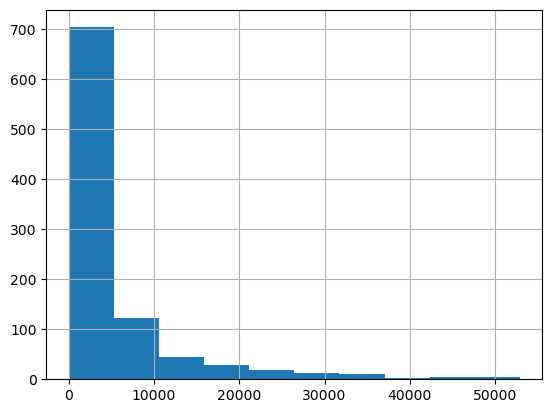

In [38]:
dropDF['in_spotify_playlists'].hist()

<Axes: >

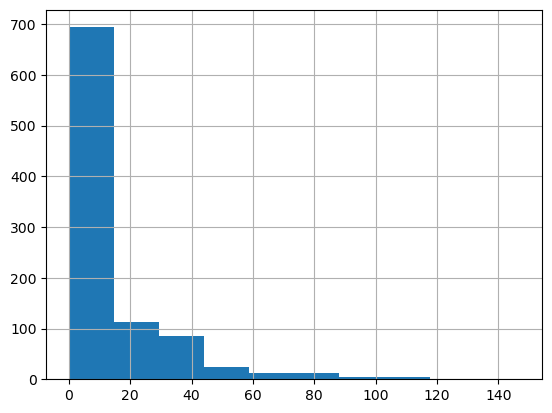

In [39]:
dropDF['in_spotify_charts'].hist()

<Axes: >

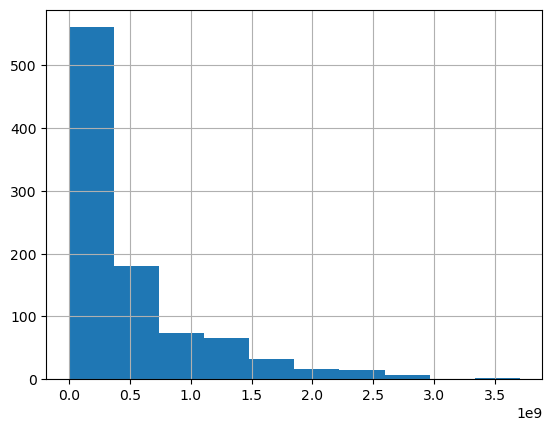

In [40]:
dropDF['streams'].hist()

<Axes: >

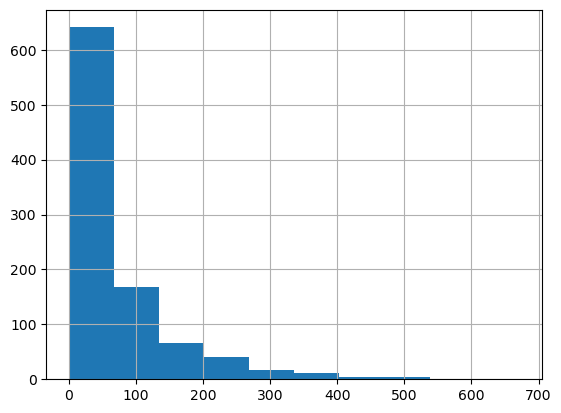

In [41]:
dropDF['in_apple_playlists'].hist()

The majority of columns will not be normally distributed since there are some songs that have a large amount of streams and the majority of songs lie around 250,000,000 while some get up to a billion or more. 